In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [117]:
df_forest_fires = pd.read_csv('forestfires.csv')

In [118]:
df_forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [119]:
df_forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


AttributeError: module 'matplotlib.pyplot' has no attribute 'log'

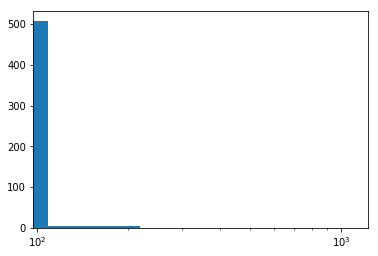

In [120]:
plt.hist(df_forest_fires['area'])
plt.xscale('log')
plt.log
plt.show()

In [121]:
df_forest_fires['log_area'] = round(np.log10(df_forest_fires['area'] + 1),2)

In [122]:
df_forest_fires.sample(19)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
85,1,2,sep,thu,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,0.00,0.00
457,1,4,aug,wed,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,82.75,1.92
158,2,4,aug,wed,92.1,111.2,654.1,9.6,20.5,35,4.0,0.0,1.64,0.42
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00,0.00
148,2,2,aug,tue,94.8,108.3,647.1,17.0,17.4,43,6.7,0.0,1.07,0.32
463,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0.81
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,3.04
118,3,4,mar,mon,90.1,39.7,86.6,6.2,10.6,30,4.0,0.0,0.00,0.00
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0.16
73,5,4,aug,tue,88.8,147.3,614.5,9.0,17.3,43,4.5,0.0,0.00,0.00


In [123]:
X = df_forest_fires.iloc[:,0:12]

In [124]:
X = X.drop('day', axis=1)

In [125]:
X.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [126]:
y = df_forest_fires.iloc[:,[-1]]

In [127]:
y.tail()

,log_area
512,0.87
513,1.74
514,1.08
515,0.00
516,0.00


<h1>Data Pre-processing</h1>

In [128]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X,columns=['month'])
X.drop('month_jan', axis=1, inplace=True)

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

array([[ 1.91798799,  3.96056013, -0.68256957, ..., -0.04926646,
        -0.18731716, -0.69685831],
       [ 1.91798799,  3.96056013, -0.81759591, ..., -0.04926646,
        -0.18731716, -0.69685831],
       [ 1.03979615, -0.20579579, -1.52648418, ..., -0.04926646,
        -0.18731716, -0.69685831],
       ...,
       [-0.27749161, -1.03906697,  0.39764112, ..., -0.04926646,
        -0.18731716, -0.69685831],
       [-0.71658753, -0.20579579,  0.16134503, ..., -0.04926646,
        -0.18731716, -0.69685831],
       [-1.15568345, -1.87233816, -0.39563861, ..., -0.04926646,
        -0.18731716, -0.69685831]])